In [3]:
import pandas as pd

further_city_data = pd.DataFrame(
     {"revenue": [7000, 3400], "employee_count":[2, 2]},
     index=["New York", "Barcelona"]
)

In [4]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

In [5]:
city_revenues = pd.Series(
...     [4200, 8000, 6500],
...     index=["Amsterdam", "Toronto", "Tokyo"]
... )
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [6]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [8]:
city_data = pd.DataFrame({
     "revenue": city_revenues,
     "employee_count": city_employee_count
})
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [9]:
# concat
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [11]:
# concat axis=1
city_countries = pd.DataFrame({
     "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
     "capital": [1, 1, 0, 0, 0]},
     index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [12]:
pd.concat([all_city_data, city_countries], axis=1, join="inner")

,revenue,employee_count,country,capital
Amsterdam,4200,5.0,Holland,1
Tokyo,6500,8.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


In [15]:
countries = pd.DataFrame({
     "population_millions": [17, 127, 37],
     "continent": ["Europe", "Asia", "North America"]
}, index= ["Holland", "Japan", "Canada"])
countries

,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [16]:
# merge don't keep rows without countries
pd.merge(cities, countries, left_on="country", right_index=True)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


In [17]:
# merge how="left"  keep rows with nan
pd.merge(
     cities,
     countries,
     left_on="country",
     right_index=True,
     how="left" 
)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


In [20]:
%matplotlib inline

nba = pd.read_csv("nba_all_elo.csv")

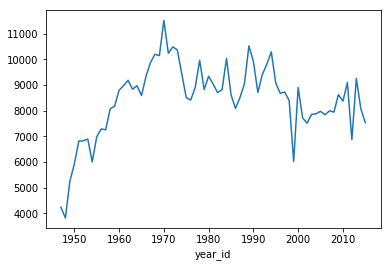

In [21]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

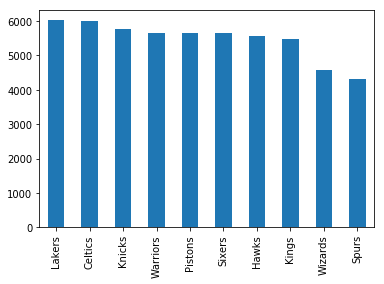

In [22]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")